In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
pip install numpy

In [ ]:
import keras

In [ ]:
(x_train,y_train), (x_test,y_test)=tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
print('Training Images: {}'.format(x_train.shape))
print('Testing Images: {}'.format(x_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [ ]:
print(x_train[0].shape)

(32, 32, 3)


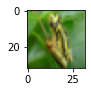

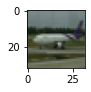

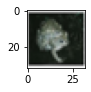

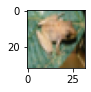

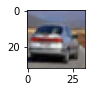

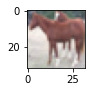

In [ ]:
for i in range(232,238):
    plt.subplot(120+1 + i)
    img = x_train[i]
    plt.imshow(img)
    plt.show()


PREPROCESSING THE DATA

In [ ]:
x_train = x_train.reshape(x_train.shape[0],32,32,3)
x_test = x_test.reshape(x_test.shape[0],32,32,3)
x_train = x_train.astype('float32')
x_test =  x_test.astype('float32')

x_train/=255
x_test = x_test/255
n_classes =10

print("shape before one-hot encoding:",y_train.shape)
Y_train = np_utils.to_categorical(y_train,n_classes)
Y_test =np_utils.to_categorical(y_test,n_classes)
print("Shape after one-hot encoding:",Y_train.shape)

shape before one-hot encoding: (50000, 1)
Shape after one-hot encoding: (50000, 10)


In [ ]:
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


BUILDING THE MODEL

In [ ]:
print("Shape before one-hot encoding:",y_train.shape)
Y_train = np_utils.to_categorical(y_train,n_classes)
Y_test =np_utils.to_categorical(y_test,n_classes)
print("Shape after one-hot encoding:",Y_train.shape)

Shape before one-hot encoding: (50000, 1)
Shape after one-hot encoding: (50000, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout, Conv2D,MaxPool2D, Flatten

model=Sequential()
#convolution layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1),padding ='same',activation='relu',input_shape=(32,32,3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1),padding ='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1),padding ='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

model.fit(x_train,Y_train, batch_size=128,epochs=20,validation_data=(x_test,Y_test))


Epoch 1/20
391/391 [==============================] - 476s 1s/step - loss: 1.6118 - accuracy: 0.4060 - val_loss: 1.2065 - val_accuracy: 0.5709
Epoch 2/20
391/391 [==============================] - 477s 1s/step - loss: 1.1190 - accuracy: 0.6021 - val_loss: 0.9306 - val_accuracy: 0.6691
Epoch 3/20
391/391 [==============================] - 478s 1s/step - loss: 0.9339 - accuracy: 0.6725 - val_loss: 0.8107 - val_accuracy: 0.7185
Epoch 4/20
391/391 [==============================] - 476s 1s/step - loss: 0.8239 - accuracy: 0.7120 - val_loss: 0.7689 - val_accuracy: 0.7312
Epoch 5/20
391/391 [==============================] - 475s 1s/step - loss: 0.7400 - accuracy: 0.7433 - val_loss: 0.7538 - val_accuracy: 0.7427
Epoch 6/20
391/391 [==============================] - 475s 1s/step - loss: 0.6703 - accuracy: 0.7652 - val_loss: 0.6884 - val_accuracy: 0.7626
Epoch 7/20
391/391 [==============================] - 475s 1s/step - loss: 0.6154 - accuracy: 0.7854 - val_loss: 0.6816 - val_accuracy: 0.7678

In [ ]:
classes = range(0,10)

names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
class_labels = dict(zip(classes,names))
batch=x_test[100:109]
labels=np.argmax(Y_test[100:109],axis=-1)
predictions=model.predict(batch,verbose= 1)

1/1 [==============================] - 0s 122ms/step


In [ ]:
print(predictions)

[[9.73353526e-05 1.86012312e-06 5.53789809e-02 9.01432522e-03
  7.85220623e-01 1.03666075e-01 4.62848220e-05 4.64246981e-02
  1.44148275e-04 5.59463706e-06]
 [2.96986924e-04 6.26643232e-05 1.44718498e-01 6.77649826e-02
  1.81700792e-02 6.98494017e-01 2.86023188e-02 4.07072566e-02
  9.35485878e-04 2.47689808e-04]
 [7.35956917e-07 2.80885661e-06 6.77521946e-03 4.86293357e-06
  5.11249880e-07 4.91039609e-05 9.93163586e-01 8.04779674e-08
  3.01433147e-06 9.71875878e-08]
 [7.38775134e-06 1.53971882e-07 1.59572315e-04 9.27750707e-01
  5.80628030e-02 9.76906717e-03 4.20157705e-03 3.54105832e-05
  1.28231750e-05 4.86685622e-07]
 [9.13261378e-09 9.99953866e-01 2.78843839e-15 1.08321793e-12
  2.04893961e-16 8.23245933e-16 7.71282170e-12 5.09605726e-15
  9.60292482e-07 4.51714513e-05]
 [1.99434336e-08 9.99973059e-01 3.18461479e-10 7.02797803e-12
  1.69007806e-14 1.92147405e-12 3.35433986e-10 2.32190603e-14
  6.45621441e-08 2.68332042e-05]
 [1.15358708e-02 1.22896174e-03 6.59243315e-02 5.47300994e

In [ ]:
for image in predictions:
   print(np.sum(image))

0.99999994
1.0
1.0
1.0
1.0
0.99999994
1.0
1.0000001
1.0


In [ ]:
class_result = np.argmax(predictions,axis=-1)
print(class_result)

[4 5 6 3 1 1 3 6 8]


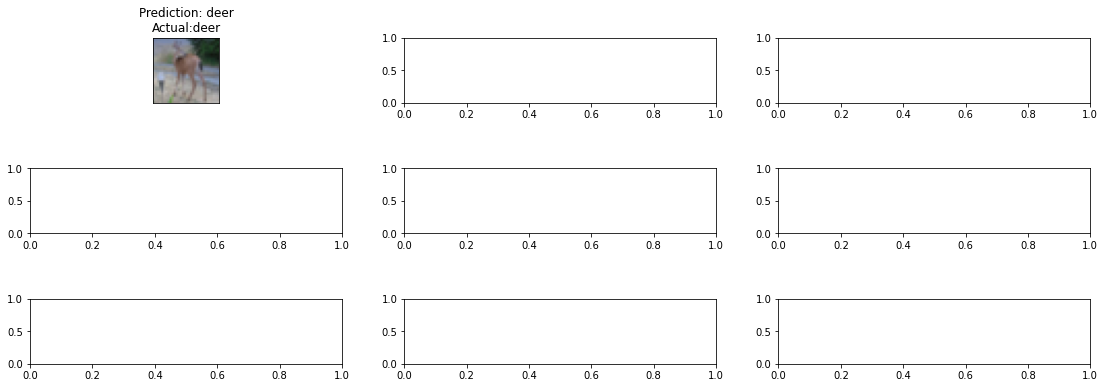

In [ ]:
fig, axs=plt.subplots(3,3,figsize=(19,6))
fig.subplots_adjust(hspace =1)
axs = axs.flatten()


for i,img in enumerate(batch):
    for key,value in class_labels.items():
        if class_result[i] == key:
           title = 'Prediction: {}\nActual:{}'.format(class_labels[key],class_labels[labels[i]])
           axs[i].set_title(title)
           axs[i].axes.get_xaxis().set_visible(False)
           axs[i].axes.get_yaxis().set_visible(False)
    #plot the image
    axs[i].imshow(img)
#show the plot
    plt.show()